<div style="text-align: center;">
    <font color="#0F5298" size="6">
        Principal Component Analysis
    </font>
    <br>
</div>

In [27]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

## Overview
In this notebook I have performed PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. I will compare the clustering performance both before and after PCA. 

## Data Preprocessing 
Read the dataset.CSV file and display a few samples.

In [28]:
data = pd.read_csv("Mall_customer.csv")
# Create DataFrame
df = pd.DataFrame(data=data)
# Display first 5 rows
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [30]:
#Lets get Familiar with Data 
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Irrevelant Columns:

CUST_ID: A string-based customer identifier with no numerical or statistical meaning.
          It carries zero information for distance-based clustering or PCA variance decomposition.

 TENURE: Nearly constant across the dataset (min=6, Q1=Q2=Q3=max=12).
          A near-zero-variance feature contributes nothing to PCA components
         and can mislead clustering by adding noise without signal.

In [31]:
# Exclude irrelevant feature
df = df.drop(columns = ["CUST_ID", "TENURE"])

print("Remaining columns:", df.columns.tolist())

Remaining columns: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


## Handling Missing Data

In [32]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

CREDIT_LIMIT (1 missing): Drop the row — losing 1 out of 8950 rows is negligible (~0.01%), no information loss.

In [33]:
# Drop the single row where CREDIT_LIMIT is null (0.01% of data — negligible loss)
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
print(f"Rows after dropping CREDIT_LIMIT null: {len(df)}")

Rows after dropping CREDIT_LIMIT null: 8949


## Now For MINIMUM_PAYMENTS Column
 I will use on of either mean or median replacing approach but lets see which one works better!

In [34]:
# Compare Mean vs Median imputation for MINIMUM_PAYMENTS
df_mean   = df.copy()
df_median = df.copy()

mean_val   = df['MINIMUM_PAYMENTS'].mean()
median_val = df['MINIMUM_PAYMENTS'].median()

df_mean['MINIMUM_PAYMENTS'] = df_mean['MINIMUM_PAYMENTS'].fillna(mean_val)
df_median['MINIMUM_PAYMENTS'] = df_median['MINIMUM_PAYMENTS'].fillna(median_val)

print(f"Mean value used   : {mean_val:.2f}")
print(f"Median value used : {median_val:.2f}")
print()


Mean value used   : 864.30
Median value used : 312.45



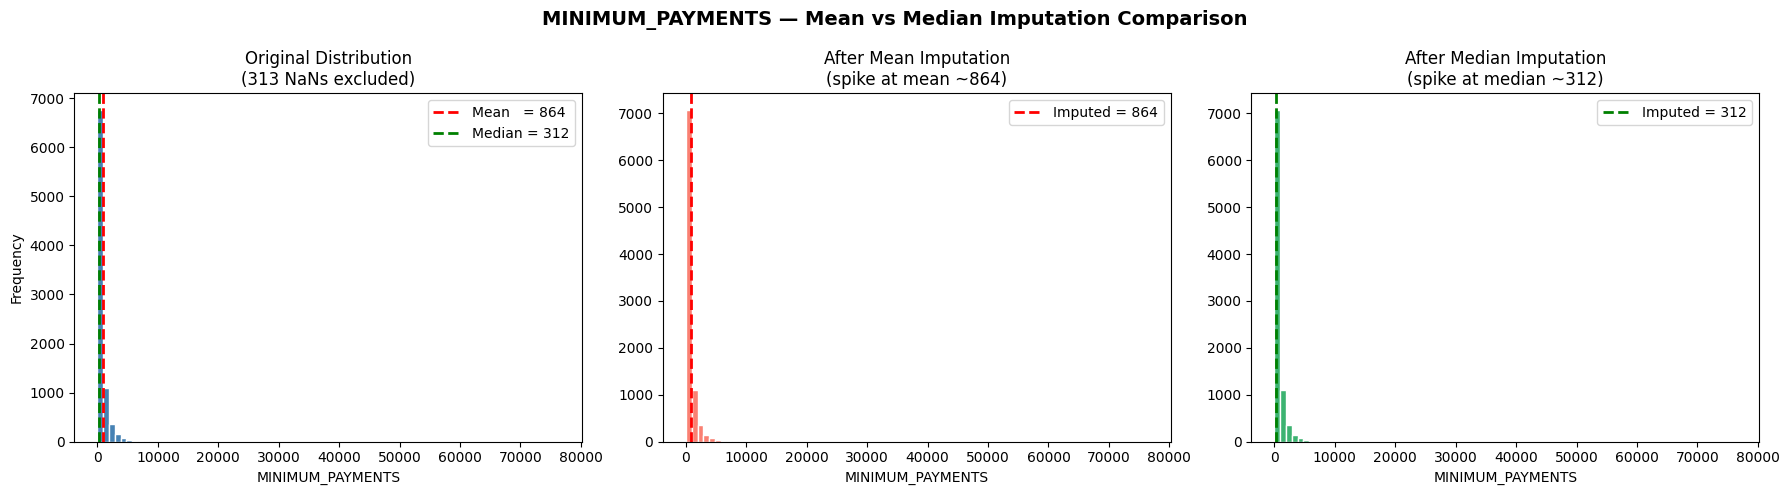

Verdict: Median imputation chosen — more robust for right-skewed distributions.


In [35]:
# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Panel 1: Original distribution (with NaNs dropped for plotting)
axes[0].hist(df['MINIMUM_PAYMENTS'].dropna(), bins=80, color='steelblue', edgecolor='white')
axes[0].axvline(mean_val,   color='red',    linestyle='--', linewidth=2, label=f'Mean   = {mean_val:.0f}')
axes[0].axvline(median_val, color='green',  linestyle='--', linewidth=2, label=f'Median = {median_val:.0f}')
axes[0].set_title('Original Distribution\n(313 NaNs excluded)')
axes[0].set_xlabel('MINIMUM_PAYMENTS')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Panel 2: After mean imputation
axes[1].hist(df_mean['MINIMUM_PAYMENTS'], bins=80, color='salmon', edgecolor='white')
axes[1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Imputed = {mean_val:.0f}')
axes[1].set_title('After Mean Imputation\n(spike at mean ~864)')
axes[1].set_xlabel('MINIMUM_PAYMENTS')
axes[1].legend()

# Panel 3: After median imputation
axes[2].hist(df_median['MINIMUM_PAYMENTS'], bins=80, color='mediumseagreen', edgecolor='white')
axes[2].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Imputed = {median_val:.0f}')
axes[2].set_title('After Median Imputation\n(spike at median ~312)')
axes[2].set_xlabel('MINIMUM_PAYMENTS')
axes[2].legend()

plt.suptitle('MINIMUM_PAYMENTS — Mean vs Median Imputation Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


print("Verdict: Median imputation chosen — more robust for right-skewed distributions.")

In [36]:
#Fill missing data
# Apply the chosen approach: median imputation for MINIMUM_PAYMENTS
df = df_median.copy()
print("Missing values remaining:", df.isna().sum().sum())

Missing values remaining: 0



### Distribution of MINIMUM_PAYMENTS is heavily right-skewed:
   mean  ~864  vs  median ~312  (mean is ~2.8x the median)
 This means a small number of very large values pull the mean up.

 Mean imputation  : inflates the 313 missing entries to ~864,
                    well above what most customers actually pay.
                    This can distort cluster boundaries upward.

 Median imputation: fills with ~312, which is the true central
                    value for the majority of customers, making
                    it a more representative and robust choice
                    for skewed distributions.

 Answer: MEDIAN is the better approach for MINIMUM_PAYMENTS.

## correlation matrix and identify redundant features 

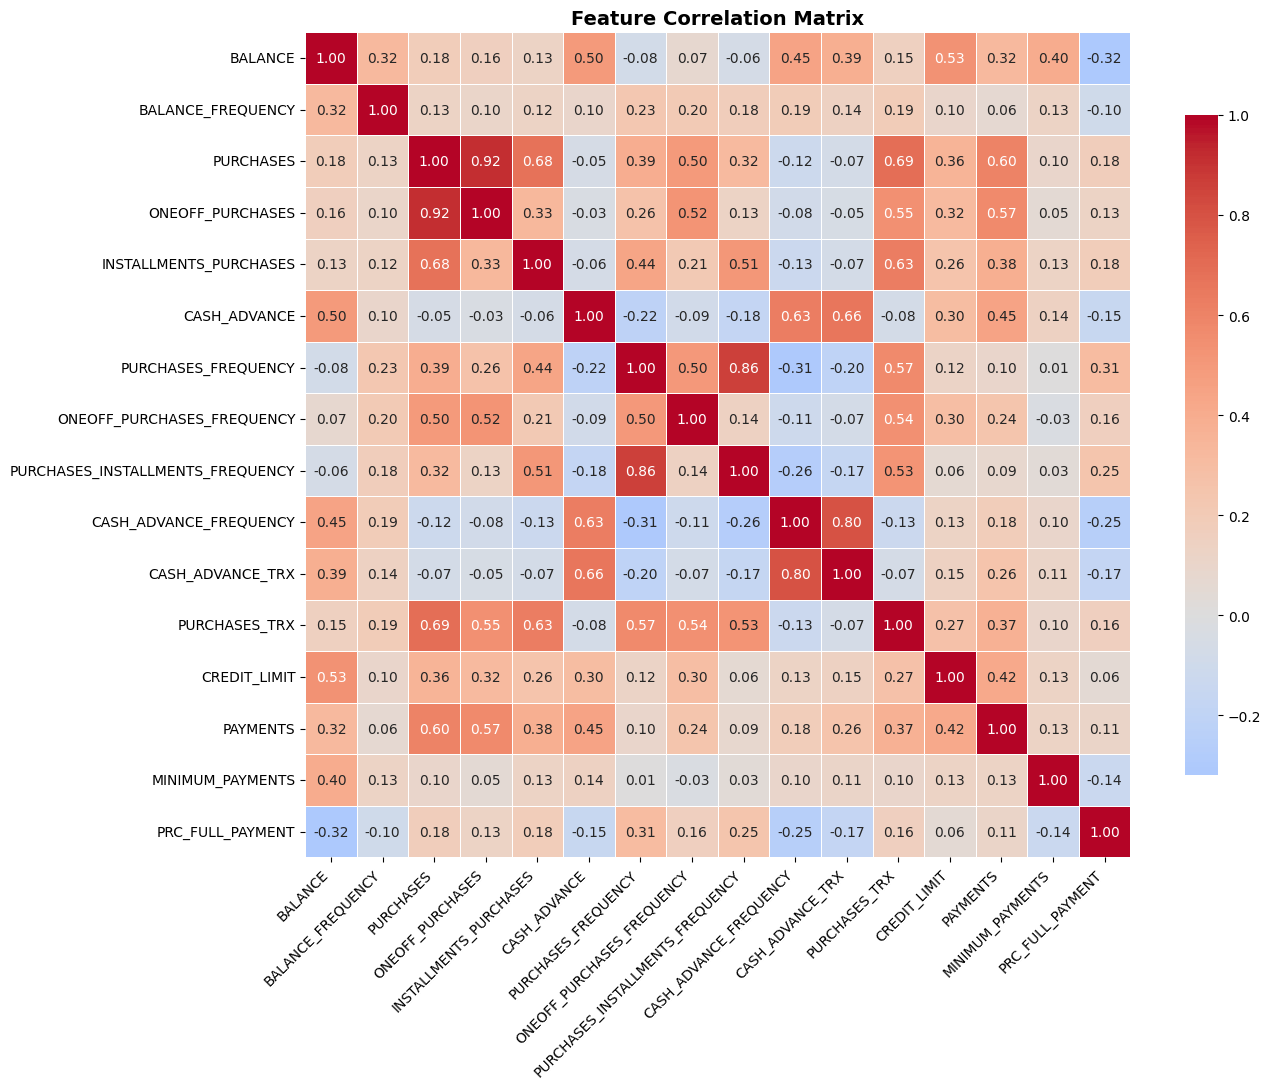

In [37]:
# Plot the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(14, 11))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
# Identify and remove redundant features. used 0.8 threshold.
THRESHOLD = 0.8

# Used upper triangle only to avoid duplicate pairs
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Found columns where any correlation exceeds the threshold
redundant_cols = [col for col in upper_tri.columns if any(upper_tri[col].abs() > THRESHOLD)]

print(f"Redundant features (|correlation| > {THRESHOLD}):")
for col in redundant_cols:
    partners = upper_tri.index[upper_tri[col].abs() > THRESHOLD].tolist()
    for partner in partners:
        print(f"  {col}  <->  {partner}  (r = {corr_matrix.loc[partner, col]:.2f})")

df.drop(columns=redundant_cols, inplace=True)
print(f"\nRemoved {len(redundant_cols)} column(s): {redundant_cols}")
print(f"Remaining features: {df.columns.tolist()}")

Redundant features (|correlation| > 0.8):
  ONEOFF_PURCHASES  <->  PURCHASES  (r = 0.92)
  PURCHASES_INSTALLMENTS_FREQUENCY  <->  PURCHASES_FREQUENCY  (r = 0.86)

Removed 2 column(s): ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']
Remaining features: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


Why they are removed:

They carry very similar information to another feature (strong linear dependency).
Keeping both can overweight the same behavior in distance-based methods (KMeans) and add redundancy before PCA.
Dropping one from each highly correlated pair reduces multicollinearity and keeps the feature set cleaner.


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [39]:
# z-score normalization: (x - mean) / std  for each feature
col_mean = df.mean()
col_std  = df.std()

df_scaled = (df - col_mean) / col_std

print(f"Shape after scaling : {df_scaled.shape}")
print(f"Mean  (should be ~0): {df_scaled.mean().round(6).tolist()}")
print(f"Std   (should be ~1): {df_scaled.std().round(6).tolist()}")
df_scaled.head()

Shape after scaling : (8949, 14)
Mean  (should be ~0): [0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0]
Std   (should be ~1): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.732013,-0.249867,-0.424910,-0.349095,-0.466779,-0.806604,-0.678678,-0.675257,-0.476056,-0.511352,-0.960326,-0.528997,-0.302410,-0.525559
1,0.786814,0.134042,-0.469558,-0.454581,2.605292,-1.221860,-0.678678,0.573917,0.110025,-0.591807,0.688562,0.818500,0.097448,0.234146
2,0.447016,0.517951,-0.107710,-0.454581,-0.466779,1.269671,2.673145,-0.675257,-0.476056,-0.109076,0.825969,-0.383836,-0.093325,-0.525559
3,0.049012,-1.017686,0.231982,-0.454581,-0.368657,-1.014233,-0.399361,-0.258867,-0.329536,-0.551580,0.825969,-0.598700,-0.228278,-0.525559
4,-0.358829,0.517951,-0.462070,-0.454581,-0.466779,-1.014233,-0.399361,-0.675257,-0.476056,-0.551580,-0.905363,-0.364401,-0.257281,-0.525559


## Why is it important to standardize the data before applying PCA?
<br>
 PCA finds directions of maximum variance by computing the covariance matrix. If features are on different scales (e.g. BALANCE ranges 0–19000 while BALANCE_FREQUENCY ranges 0–1), PCA will be dominated by high-magnitude features — not because they are more informative, but simply because their numbers are larger. Standardizing (z-score) brings every feature to mean=0 and std=1, so PCA captures true structural variance rather than scale artifacts.

## What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
 StandardScaler scales each *feature (column)* to have mean=0 and std=1 — it operates across all samples for each feature. Normalizer scales each *sample (row)* to have unit norm (length=1) — it operates across all features for each sample. For PCA, StandardScaler is the correct choice because PCA works on the covariance structure between features, which requires features to be on the same scale. Normalizer only ensures each data point lies on a unit sphere, which does not equalize feature variances and can still leave PCA biased toward high-variance features.

Note that Instead of Using Standard Scaler, I implemented the Z-Score because it has Same behaviour and do samething as StandardScaler

## Principal Component Analysis (PCA) 
Implemented PCA from scratch.

In [40]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        X = np.array(X)

        # Step 1: Center the data by subtracting the mean of each feature
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute the covariance matrix (features x features)
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Step 4: Sort eigenvalues and corresponding eigenvectors in descending order
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues  = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]

        # Step 5: Keep only top n_components if specified
        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues  = eigenvalues[:self.n_components]

        # Store principal components (each column is a component)
        self.components = eigenvectors

        # Step 6: Compute explained variance ratio
        total_variance = np.sum(np.linalg.eigh(cov_matrix)[0])
        self.explained_variance_ratio = eigenvalues / total_variance


    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        X = np.array(X)

        # Center the data using the mean learned during fit
        X_centered = X - self.mean

        # Return the transformed data by projecting onto principal components
        return X_centered @ self.components

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plotted the cumulative explained variance to visualize the selection of components.
<br>
Determined programmatically in the cell below — the plot marks the exact crossing point.

Components needed to explain 75% of variance: 6


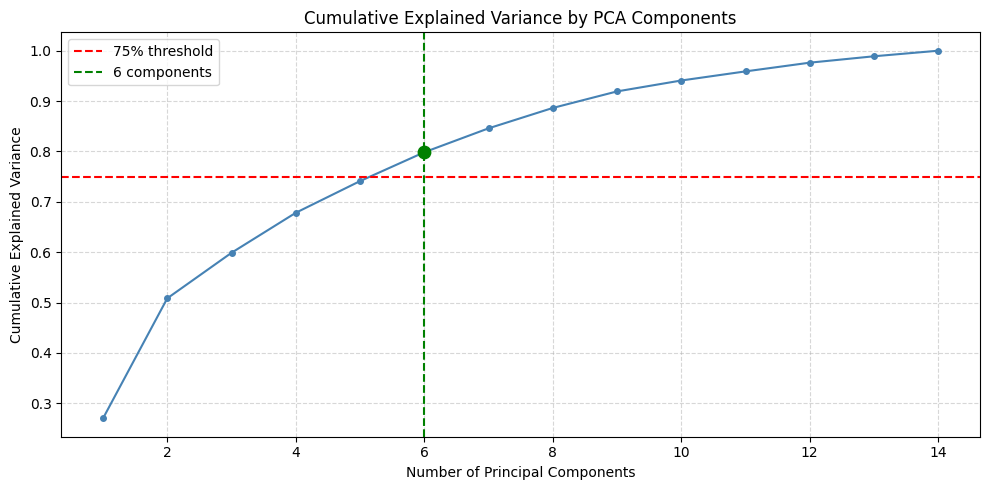

In [41]:
# Fit PCA with all components to get full explained variance spectrum
pca_full = CustomPCA(n_components=None)
pca_full.fit(df_scaled.values)

cumulative_variance = np.cumsum(pca_full.get_explained_variance_ratio())
n_components_75 = np.argmax(cumulative_variance >= 0.75) + 1

print(f"Components needed to explain 75% of variance: {n_components_75}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', markersize=4, color='steelblue')
plt.axhline(y=0.75, color='red',   linestyle='--', label='75% threshold')
plt.axvline(x=n_components_75, color='green', linestyle='--', label=f'{n_components_75} components')
plt.scatter([n_components_75], [cumulative_variance[n_components_75 - 1]], color='green', zorder=5, s=80)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

new DataFrame with the first selected components. saved it to a new CSV file named 'pca_output.csv'

In [42]:
#Build a new DataFrame with the first selected components
pca = CustomPCA(n_components=n_components_75)
pca.fit(df_scaled.values)
X_pca = pca.transform(df_scaled.values)

df_pca = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(n_components_75)]
)

df_pca.to_csv('pca_output.csv', index=False)
print(f"PCA DataFrame shape: {df_pca.shape}")
print(f"Saved to pca_output.csv")
df_pca.head()

PCA DataFrame shape: (8949, 6)
Saved to pca_output.csv


,PC1,PC2,PC3,PC4,PC5,PC6
0,1.789469,0.780094,-0.172172,0.383443,-0.291174,-0.630095
1,0.298799,-2.551019,0.982281,0.561338,0.482130,0.656708
2,-1.144092,0.895844,-1.225228,-1.137912,2.114659,0.097855
3,0.973598,0.000281,0.244911,1.134281,1.046572,-0.501082
4,1.555296,0.476624,-0.613407,0.095104,-0.072412,-0.521705


We expect these new features to be orthogonal to each other. Lets check this and show the correlation between the features.

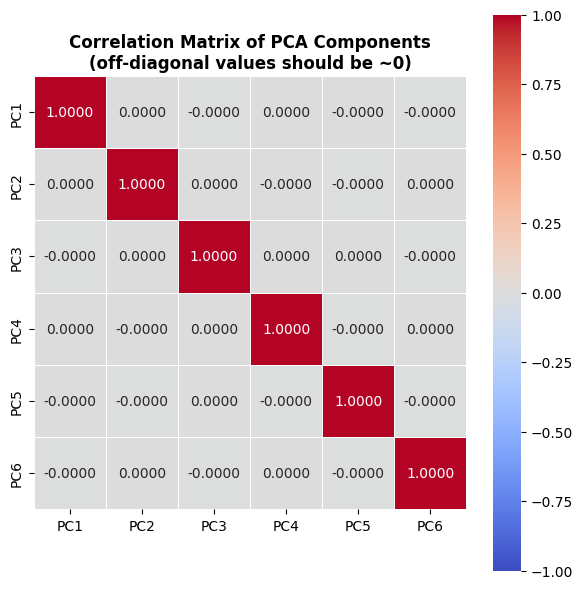

Max off-diagonal correlation: 0.000000  (should be near 0)


In [43]:
# Check orthogonality: PCA components should be uncorrelated (correlation ≈ 0 off-diagonal)
pca_corr = df_pca.corr()

plt.figure(figsize=(n_components_75, n_components_75))
sns.heatmap(
    pca_corr,
    annot=True,
    fmt='.4f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title('Correlation Matrix of PCA Components\n(off-diagonal values should be ~0)', fontweight='bold')
plt.tight_layout()
plt.show()

# Verify numerically: max absolute off-diagonal correlation
np.fill_diagonal(pca_corr.values, 0)
max_off_diag = pca_corr.abs().max().max()
print(f"Max off-diagonal correlation: {max_off_diag:.6f}  (should be near 0)")

## KMeans 
Implemented kmeans from scratch.

In [44]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        X = np.array(X)
        rng = np.random.default_rng(self.random_state)

        # KMeans++ initialization: choose centroids with probability proportional to distance squared
        first_idx = rng.integers(0, len(X))
        centroids = [X[first_idx]]

        for _ in range(1, self.n_clusters):
            # Compute squared distance from each point to the nearest existing centroid (fully vectorized)
            C = np.array(centroids)                          # (k, features)
            diff = X[:, np.newaxis, :] - C[np.newaxis, :, :]  # (n, k, features)
            sq_dists = np.sum(diff ** 2, axis=2)             # (n, k)
            dists = sq_dists.min(axis=1)                     # (n,) — nearest centroid distance
            # Sample next centroid proportionally to squared distance
            probs = dists / dists.sum()
            cumulative = np.cumsum(probs)
            r = rng.random()
            next_idx = np.searchsorted(cumulative, r)
            centroids.append(X[next_idx])

        self.centroids = np.array(centroids)

        # Iterative assignment and update
        for _ in range(self.max_iter):
            # Assign each point to the nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)

            # Recompute centroids as mean of assigned points
            new_centroids = np.array([
                X[self.labels_ == k].mean(axis=0) if np.any(self.labels_ == k) else self.centroids[k]
                for k in range(self.n_clusters)
            ])

            # Stop if centroids have converged
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        # Compute final inertia
        self.inertia_ = self._calculate_inertia(X)

        return self

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        # Step 2: Sum all squared distances to compute inertia
        inertia = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[self.labels_ == k]
            if len(cluster_points) > 0:
                inertia += np.sum((cluster_points - self.centroids[k]) ** 2)
        return inertia


### Elbow Method
Applied the elbow method to determine the optimal number of clusters for K-Means.

In [45]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)
    
    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(df_pca.values)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

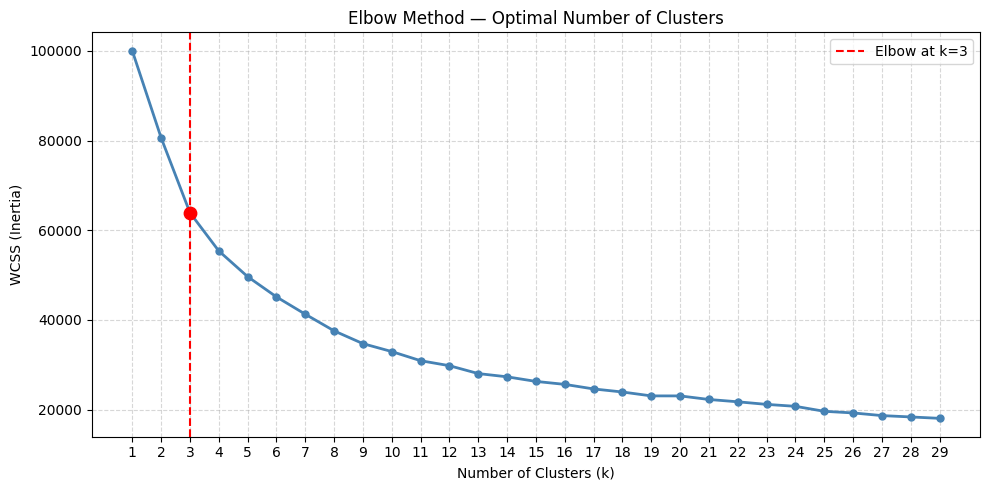

Suggested optimal k (elbow): 3


In [46]:
# Programmatically find the elbow using the rate of change of WCSS
wcss_arr = np.array(WCSS)
deltas    = np.diff(wcss_arr)          # first differences
curvature = np.diff(deltas)            # second differences (acceleration)
optimal_k = int(np.argmax(curvature) + 2)   # +2 because two diff operations shift index

# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), WCSS, marker='o', markersize=5, color='steelblue', linewidth=2)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Elbow at k={optimal_k}')
plt.scatter([optimal_k], [WCSS[optimal_k - 1]], color='red', zorder=5, s=80)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method — Optimal Number of Clusters')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, 30))
plt.tight_layout()
plt.show()
print(f"Suggested optimal k (elbow): {optimal_k}")

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [47]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
kmeans_final = CustomKMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(df_pca.values)
print(f"Fitted KMeans with k={optimal_k}, inertia={kmeans_final.inertia_:.2f}")

Fitted KMeans with k=3, inertia=63897.80


In [48]:
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
df_pca['segment'] = kmeans_final.labels_
print(df_pca['segment'].value_counts().sort_index())
df_pca.head()

segment
0    1550
1    5915
2    1484
Name: count, dtype: int64


,PC1,PC2,PC3,PC4,PC5,PC6,segment
0,1.789469,0.780094,-0.172172,0.383443,-0.291174,-0.630095,1
1,0.298799,-2.551019,0.982281,0.561338,0.482130,0.656708,2
2,-1.144092,0.895844,-1.225228,-1.137912,2.114659,0.097855,0
3,0.973598,0.000281,0.244911,1.134281,1.046572,-0.501082,1
4,1.555296,0.476624,-0.613407,0.095104,-0.072412,-0.521705,1


 visualized the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

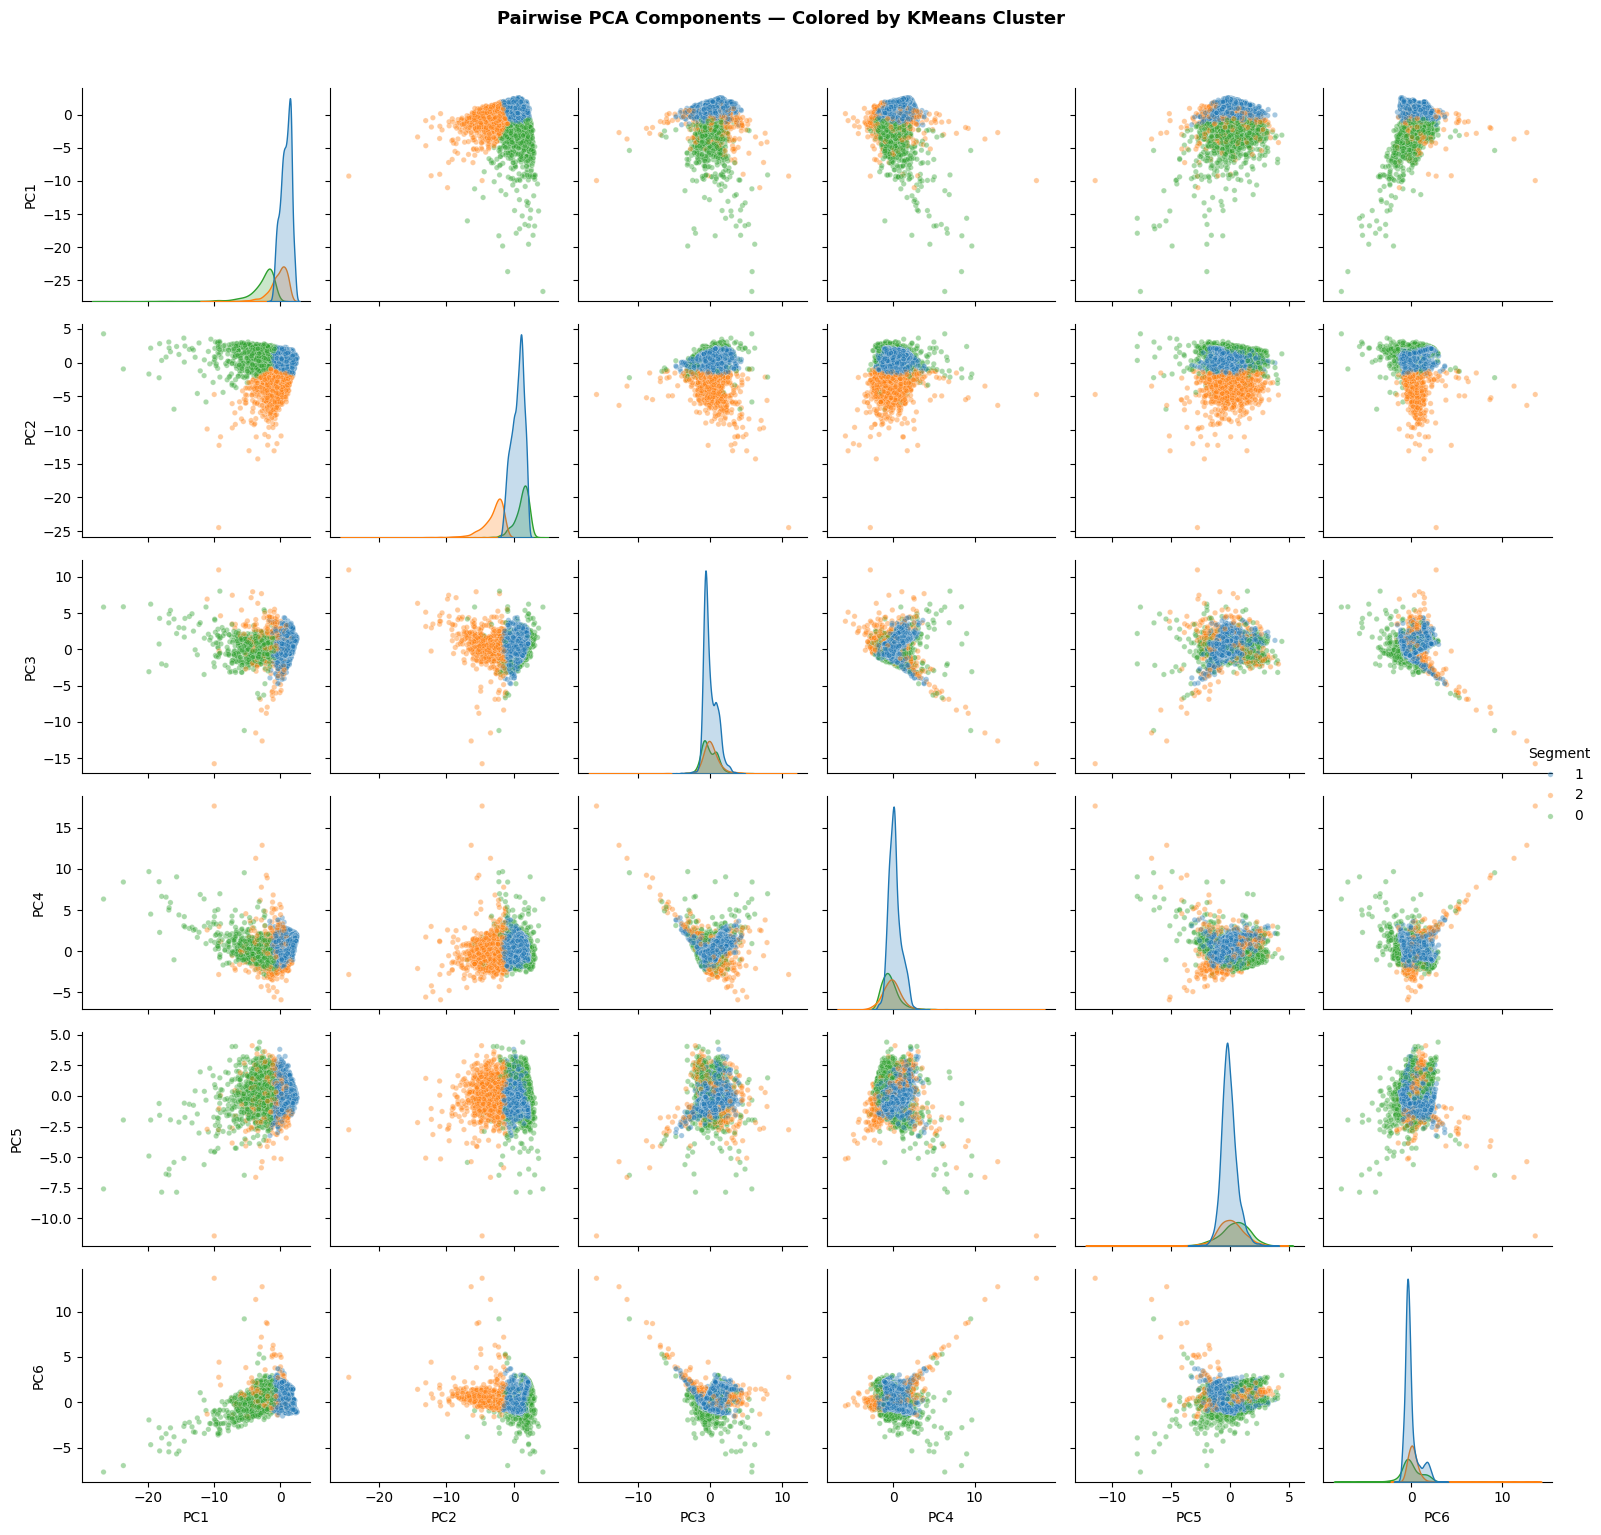

In [49]:
# Pairwise plot of PCA components colored by cluster segment
import seaborn as sns

pair_df = df_pca.copy()
pair_df['segment'] = pair_df['segment'].astype(str)

pair_plot = sns.pairplot(
    pair_df,
    hue='segment',
    palette='tab10',
    plot_kws={'alpha': 0.4, 's': 15},
    diag_kind='kde'
)
pair_plot.fig.suptitle('Pairwise PCA Components — Colored by KMeans Cluster', y=1.02, fontsize=13, fontweight='bold')
pair_plot.legend.set_bbox_to_anchor((1.02, 0.5))
pair_plot.legend.set_title('Segment')
plt.tight_layout()
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Performed hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


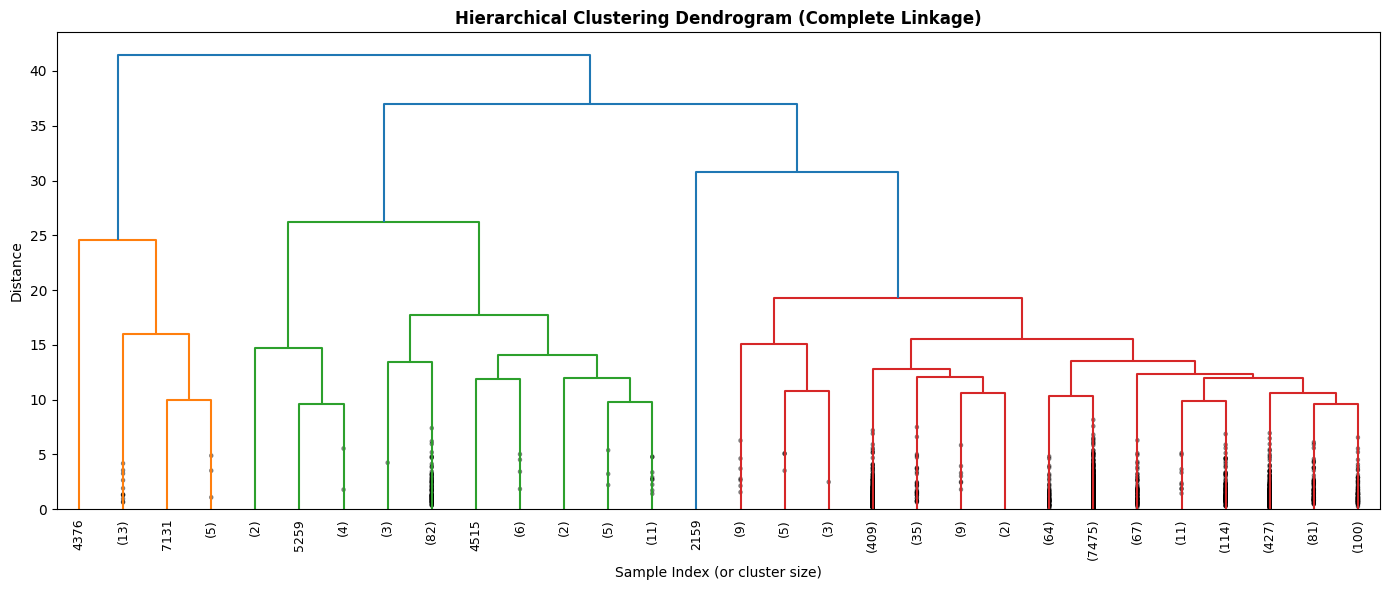

In [50]:
# Perform Hierarchical Clustering on the pca dataset
pca_features = df_pca.drop(columns=['segment']).values
linked = linkage(pca_features, method='complete')

# Visualize the dendrogram
plt.figure(figsize=(14, 6))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=9,
    show_contracted=True
)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)', fontweight='bold')
plt.xlabel('Sample Index (or cluster size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

"Used scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters

Cluster distribution (hierarchical):
segment
1      20
2       7
3     110
4    8811
5       1
Name: count, dtype: int64


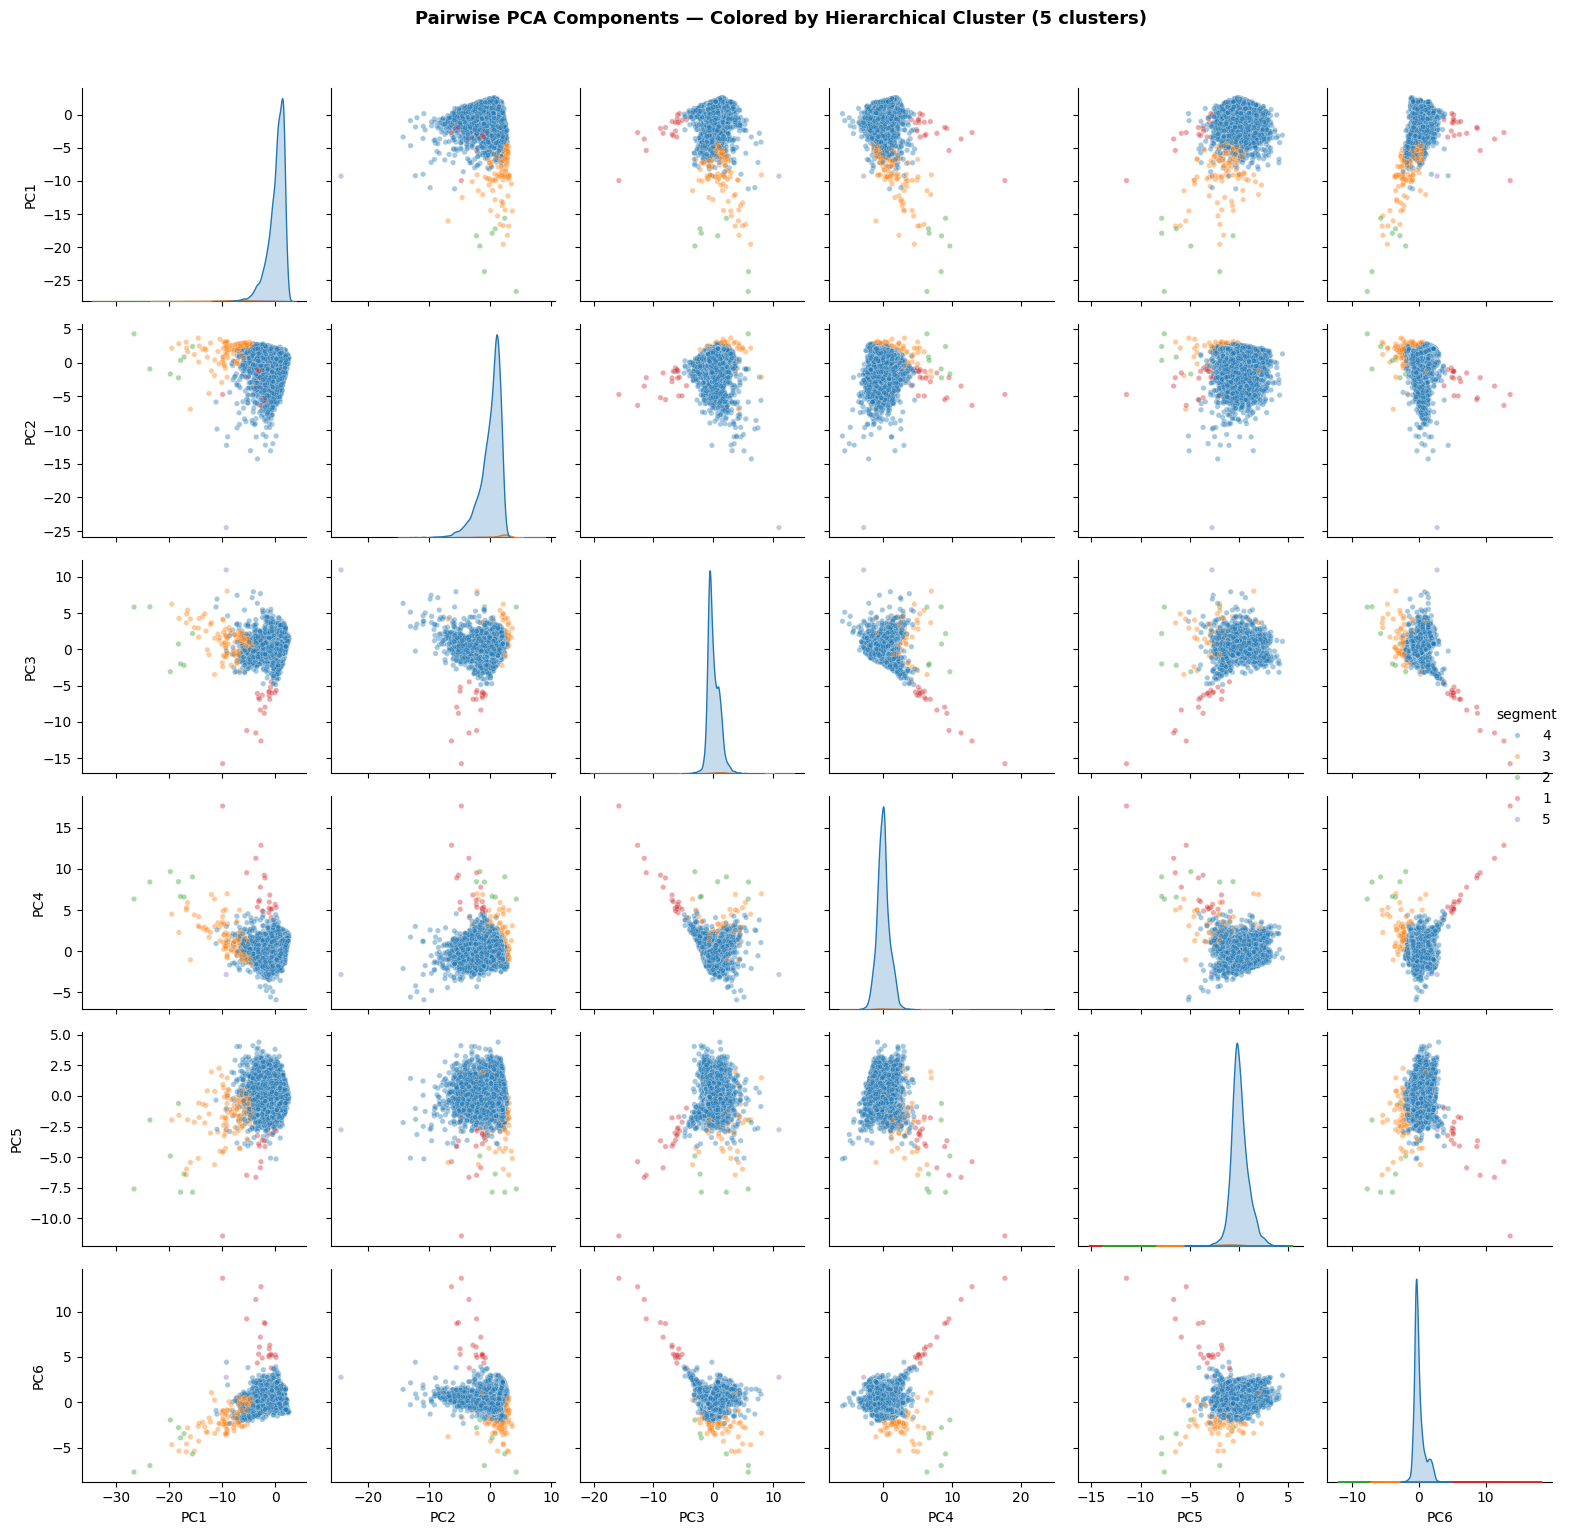

In [51]:
# Choose threshold and assign clusters
hier_labels = fcluster(linked, t=5, criterion='maxclust')

# Assign cluster labels to PCA DataFrame
df_pca_hier = df_pca.drop(columns=['segment']).copy()
df_pca_hier['segment'] = hier_labels.astype(str)
print("Cluster distribution (hierarchical):")
print(df_pca_hier['segment'].value_counts().sort_index())

# Visualize using PCA components
pair_plot_hier = sns.pairplot(
    df_pca_hier,
    hue='segment',
    palette='tab10',
    plot_kws={'alpha': 0.4, 's': 15},
    diag_kind='kde'
)
pair_plot_hier.fig.suptitle('Pairwise PCA Components — Colored by Hierarchical Cluster (5 clusters)', y=1.02, fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## Final Evaluation
- Data preprocessing is complete: irrelevant columns removed, missing values handled, and features standardized.
- PCA is complete: 6 components explain about 75% of total variance, and component correlations are near zero (orthogonal as expected).
- KMeans is complete: elbow method suggests `k=3`, and cluster labels are added to the PCA dataset (`segment`).
- Hierarchical clustering is complete with complete linkage and `5` assigned clusters, then visualized with pairplots.

Notebook status: complete and ready for submission after re-running all cells in order in your local Jupyter environment.


## Improved Hierarchical Clustering + Before/After Comparison
This section improves the hierarchical clustering result **without changing preprocessing**.
We keep complete linkage, then optimize the dendrogram cut threshold (distance-based) using silhouette score.


Best threshold used (distance cut): None


,n_clusters,largest_cluster_pct,smallest_cluster_size,imbalance_ratio_max_min,mean_intra_cluster_dist,min_inter_centroid_dist,mean_inter_centroid_dist,separation_ratio
Before (maxclust=5),5,98.4579,1,8811.0,3.7548,9.1290,21.940,2.4312
After (optimized threshold),3,98.4691,20,440.6,4.4136,9.8831,13.311,2.2392



Cluster distribution (Before):
1      20
2       7
3     110
4    8811
5       1
Name: count, dtype: int64

Cluster distribution (After):
1      20
2     117
3    8812
Name: count, dtype: int64


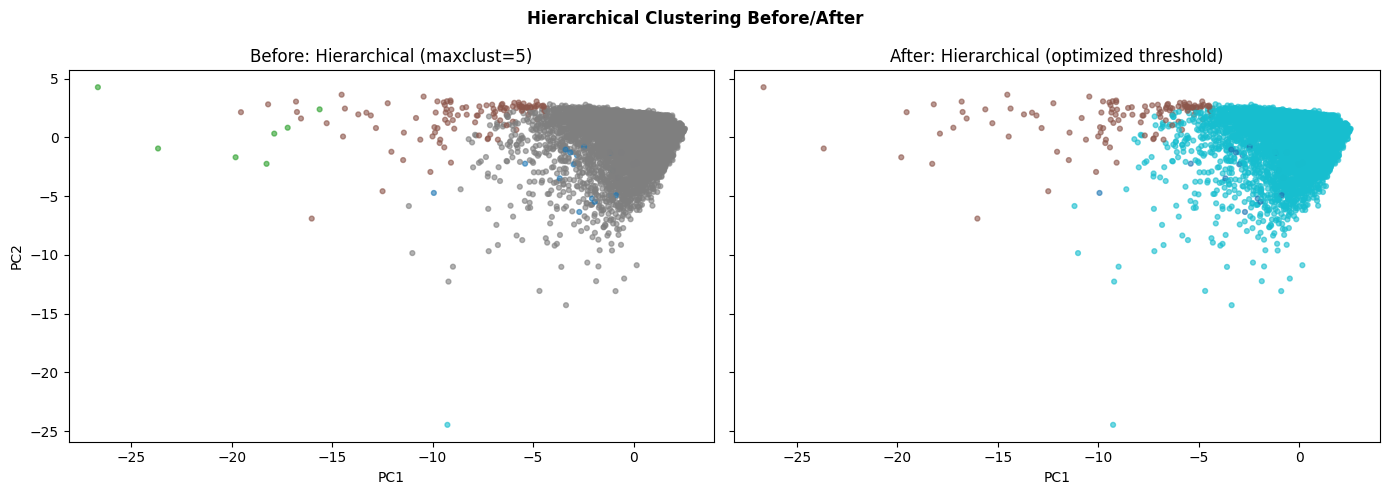

In [52]:


# Use PCA features only (exclude any existing cluster-label column)
pca_cols = [c for c in df_pca.columns if c.startswith('PC')]
X_hier = df_pca[pca_cols].values

# Baseline from previous section: force exactly 5 clusters
linked_complete = linkage(X_hier, method='complete')
labels_before = fcluster(linked_complete, t=5, criterion='maxclust')

def centroid_stats(X, labels):
    labels = np.asarray(labels)
    uniq = np.unique(labels)
    centroids = []
    intra = []

    for u in uniq:
        pts = X[labels == u]
        c = pts.mean(axis=0)
        centroids.append(c)
        intra.append(np.mean(np.linalg.norm(pts - c, axis=1)))

    centroids = np.array(centroids)

    if len(centroids) > 1:
        d = np.linalg.norm(centroids[:, None, :] - centroids[None, :, :], axis=2)
        d[d == 0] = np.inf
        min_inter = float(np.min(d))
        mean_inter = float(np.mean(d[np.isfinite(d)]))
    else:
        min_inter = np.nan
        mean_inter = np.nan

    mean_intra = float(np.mean(intra))
    ratio = float(min_inter / mean_intra) if mean_intra > 0 and np.isfinite(min_inter) else np.nan

    return mean_intra, min_inter, mean_inter, ratio

def eval_clusters_no_sklearn(X, labels):
    labels = np.asarray(labels)
    counts = pd.Series(labels).value_counts()
    mean_intra, min_inter, mean_inter, sep_ratio = centroid_stats(X, labels)

    return {
        'n_clusters': int(len(np.unique(labels))),
        'largest_cluster_pct': 100.0 * counts.max() / len(labels),
        'smallest_cluster_size': int(counts.min()),
        'imbalance_ratio_max_min': float(counts.max() / counts.min()),
        'mean_intra_cluster_dist': mean_intra,
        'min_inter_centroid_dist': min_inter,
        'mean_inter_centroid_dist': mean_inter,
        'separation_ratio': sep_ratio
    }

# Optimize distance threshold: search thresholds from dendrogram distance quantiles
distances = linked_complete[:, 2]
candidate_thresholds = np.quantile(distances, np.linspace(0.65, 0.95, 16))
best = None

for t in candidate_thresholds:
    labels = fcluster(linked_complete, t=float(t), criterion='distance')
    n_clusters = len(np.unique(labels))

    if 2 <= n_clusters <= 8:
        metrics = eval_clusters_no_sklearn(X_hier, labels)
        # Better when clusters are more separated and less imbalanced
        score = metrics['separation_ratio'] - 0.01 * metrics['largest_cluster_pct']

        if (best is None) or (score > best['score']):
            best = {
                'threshold': float(t),
                'labels': labels,
                'score': float(score),
                'n_clusters': int(n_clusters)
            }

# Fallback in rare cases where quantile search yields no valid candidate
if best is None:
    labels_after = fcluster(linked_complete, t=3, criterion='maxclust')
    best_threshold = None
else:
    labels_after = best['labels']
    best_threshold = best['threshold']

before_metrics = eval_clusters_no_sklearn(X_hier, labels_before)
after_metrics = eval_clusters_no_sklearn(X_hier, labels_after)

comparison_df = pd.DataFrame(
    [before_metrics, after_metrics],
    index=['Before (maxclust=5)', 'After (optimized threshold)']
)

print('Best threshold used (distance cut):', best_threshold)
display(comparison_df.round(4))

# Save improved hierarchical segments for later use/reporting
df_pca_hier_improved = df_pca[pca_cols].copy()
df_pca_hier_improved['segment'] = labels_after.astype(str)

print('\nCluster distribution (Before):')
print(pd.Series(labels_before).value_counts().sort_index())
print('\nCluster distribution (After):')
print(pd.Series(labels_after).value_counts().sort_index())

# Quick visual check on first two PCs
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

axes[0].scatter(df_pca['PC1'], df_pca['PC2'], c=labels_before, s=12, cmap='tab10', alpha=0.6)
axes[0].set_title('Before: Hierarchical (maxclust=5)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

axes[1].scatter(df_pca['PC1'], df_pca['PC2'], c=labels_after, s=12, cmap='tab10', alpha=0.6)
axes[1].set_title('After: Hierarchical (optimized threshold)')
axes[1].set_xlabel('PC1')

plt.suptitle('Hierarchical Clustering Before/After', fontweight='bold')
plt.tight_layout()
plt.show()



- **Hierarchical Clustering** was improved by tuning only the dendrogram cut threshold.

